# Ciência de Dados Avançada - Advanced Data Science


![Data Science Life-cycle](img/pipeline2.png)

* Os passos estão organizados em ciclos por uma razão
* O trabalho pode ser por vezes muito repetitivo
* Para automatizar os passos por vezes repetitivos, e minimizar erros de código, podemos construir pipelines.


## Pipelines

**Por que precisamos pré-processar os dados?**


## Exemplo

Vamos ver um modelo de regressão linear para dados sintéticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import SimpleImputer
import mglearn

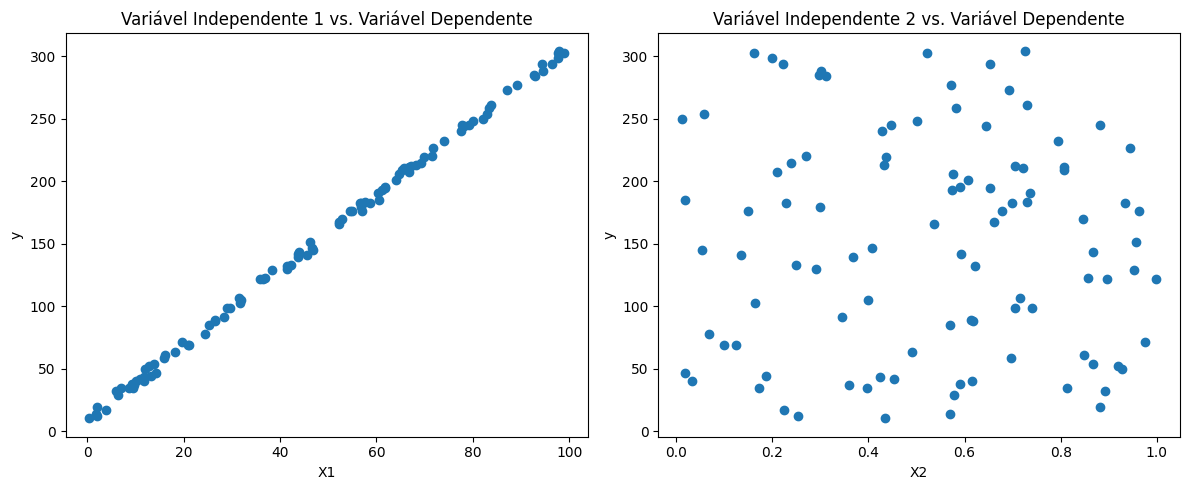

In [2]:
# Gerando dados sintéticos com duas variáveis independentes em escalas diferentes
np.random.seed(0)
X1 = 100 * np.random.rand(100, 1)  # Variável independente 1 (escala de 0 a 100)
X2 = np.random.rand(100, 1)  # Variável independente 2 (escala de 0 a 1)
y = 4 + 3 * X1 + 10 * X2 + np.random.randn(100, 1)  # Variável dependente

# Visualizando os dados
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X1, y)
axs[0].set_xlabel('X1')
axs[0].set_ylabel('y')
axs[0].set_title('Variável Independente 1 vs. Variável Dependente')

axs[1].scatter(X2, y)
axs[1].set_xlabel('X2')
axs[1].set_ylabel('y')
axs[1].set_title('Variável Independente 2 vs. Variável Dependente')

plt.tight_layout()
plt.show()


Vamos criar uma regressão linear para prever `y` em função de `x1` e `x2`

In [3]:
# Ajustando um modelo de regressão linear sem normalização
model = LinearRegression()
X = np.concatenate((X1, X2), axis=1)
model.fit(X, y)

LinearRegression()

Como podemos avaliar se a nossa regressão linear funciona?

In [4]:
# Coeficientes do modelo
print('Coeficiente de interceptação:', model.intercept_[0])
print('Coeficientes angulares:', model.coef_)

Coeficiente de interceptação: 4.307305306797048
Coeficientes angulares: [[2.99448354 9.74115323]]


Assim, a nossa variável dependente `y` pode ser calculada através da equação:

$$ y = 2.99448354 \times x1 + 9.74115323 \times x2 + 4.307305306797048 $$

Vamos visualizar a regressão e os dados:

In [5]:
x1_line = np.arange(0, 100)
x2_line = np.linspace(0, 1, 100)
X_line = np.concatenate((x1_line.reshape(-1, 1), x2_line.reshape(-1, 1)), axis=1)

y_line = model.predict(X_line)
y_line_calc = model.intercept_[0] + model.coef_[0,0]*x1_line + model.coef_[0,1]*x2_line

Coeficiente de interceptação: 4.307305306797048
Coeficientes angulares: [[2.99448354 9.74115323]]


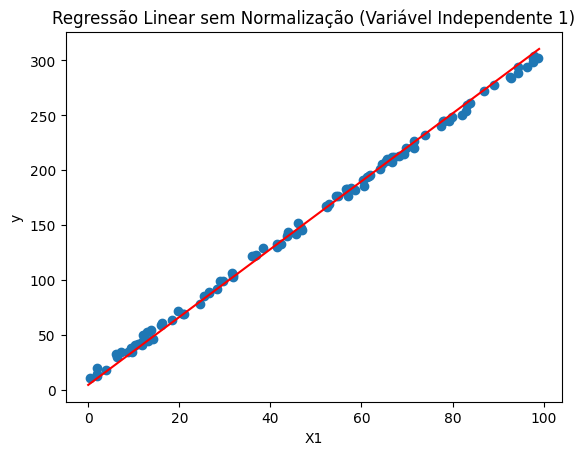

In [6]:
# Coeficientes do modelo
print('Coeficiente de interceptação:', model.intercept_[0])
print('Coeficientes angulares:', model.coef_)
# Visualizando a linha de regressão
y_pred = model.predict(X)
plt.scatter(X1, y)
plt.plot(x1_line, y_line, color='red')
# plt.plot(x1_line, y_line_calc, color='green')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Regressão Linear sem Normalização (Variável Independente 1)')
plt.show()


## E o erro?

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos sem normalização
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Métricas para o modelo sem normalização:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

Métricas para o modelo sem normalização:
MAE: 0.7463329931706053
MSE: 0.8316163710670046
RMSE: 0.9119300253128003
R²: 0.9998880799180376


Mas o modelo é bom?
O que significam os valores dos coeficientes?
Esse modelo faz sentido?
Qual o problema do modelo?



## Vamos "normalizar" as variáveis independentes

Coeficiente de interceptação (dados normalizados): 151.02876785181078
Coeficientes angulares (dados normalizados): [[86.33144121  2.69546456]]


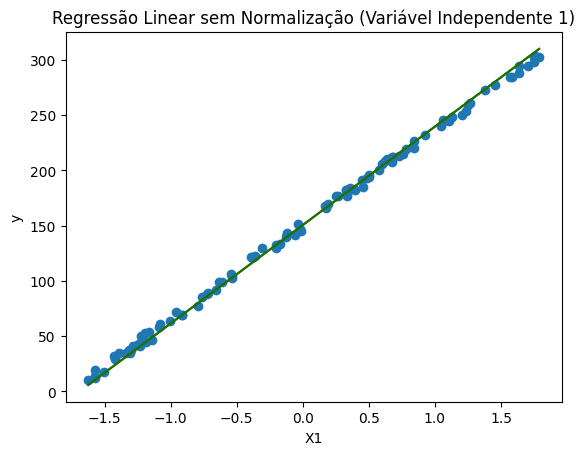

In [8]:
# Normalizando os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Ajustando um modelo de regressão linear com dados normalizados
model_normalized = LinearRegression()
model_normalized.fit(X_normalized, y)

# Coeficientes do modelo com dados normalizados
print('Coeficiente de interceptação (dados normalizados):', model_normalized.intercept_[0])
print('Coeficientes angulares (dados normalizados):', model_normalized.coef_)

# Visualizando a linha de regressão

x1_line_norm = np.linspace(np.min(X_normalized[:,0]), np.max(X_normalized[:,0]), 100)
x2_line_norm = np.linspace(np.min(X_normalized[:,1]), np.max(X_normalized[:,1]), 100)
X_line_norm = np.concatenate((x1_line_norm.reshape(-1, 1), x2_line_norm.reshape(-1, 1)), axis=1)

y_pred_normalized = model_normalized.predict(X_normalized)

y_line_norm = model_normalized.predict(X_line_norm)
y_line_calc_norm = model_normalized.intercept_[0] + model_normalized.coef_[0,0]*x1_line_norm + model_normalized.coef_[0,1]*x2_line_norm


plt.scatter(X_normalized[:, 0], y)
plt.plot(x1_line_norm, y_line_norm, color='red')
plt.plot(x1_line_norm, y_line_calc_norm, color='green')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Regressão Linear sem Normalização (Variável Independente 1)')
plt.show()



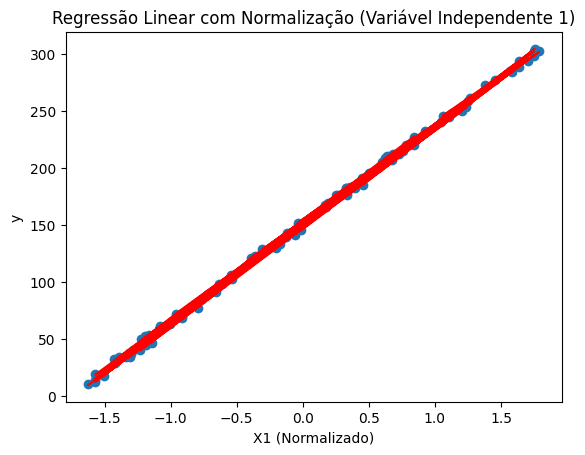

In [9]:
# Visualizando a linha de regressão com dados normalizados

plt.scatter(X_normalized[:, 0], y)
plt.plot(X_normalized[:, 0], y_pred_normalized, color='red')
plt.xlabel('X1 (Normalizado)')
plt.ylabel('y')
plt.title('Regressão Linear com Normalização (Variável Independente 1)')
plt.show()


In [10]:
y_pred_normalized = model_normalized.predict(X_normalized)
mae_normalized = mean_absolute_error(y, y_pred_normalized)
mse_normalized = mean_squared_error(y, y_pred_normalized)
rmse_normalized = np.sqrt(mse_normalized)
r2_normalized = r2_score(y, y_pred_normalized)

print("\nMétricas para o modelo com normalização:")
print("MAE:", mae_normalized)
print("MSE:", mse_normalized)
print("RMSE:", rmse_normalized)
print("R²:", r2_normalized)


Métricas para o modelo com normalização:
MAE: 0.7463329931706036
MSE: 0.8316163710670001
RMSE: 0.9119300253127979
R²: 0.9998880799180376


Qual modelo é melhor?

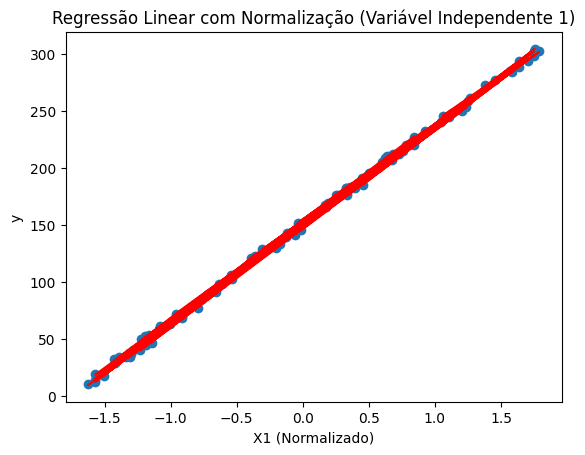

In [11]:
# Visualizando a linha de regressão com dados normalizados

plt.scatter(X_normalized[:, 0], y)
plt.plot(X_normalized[:, 0], y_pred_normalized, color='red')
plt.xlabel('X1 (Normalizado)')
plt.ylabel('y')
plt.title('Regressão Linear com Normalização (Variável Independente 1)')
plt.show()


## De volta à pergunta:

** Por que pré-processamos os dados?**

Vários motivos:
1. Tratar valores ausentes: dados reais frequentemente contém dados ausentes (missing data), que podem causar viés e erros nos resultados dos modelos. Técnicas de pré-processamento como imputation nos ajudam a substituir estes valores com estimativas apropriadas.
2. Normalizar e colocar dados em escala: modelos de ML frequentemente apresentam melhores resultados quando as features estão na mesma escala. Técnicas como Min-Max scaling e Z-score normalization coloca todas as features em um intervalo semelhante, evitando que uma feature seja dominante por seus valores.
3. Outliers: outliers podem afetar a performance de modelos. Técnicas de pré-processamento ajudam a identificar e tratar outliers.
4. Codificação de variáveis categóricas: ML models precisam de features numéricas, mas os dados reais incluem variáveis categóricas. Técnicas como one-hot encoding ou label encoding convertem dados categóricos em numéricos.
5. Seleção e extração de features: o pré-processamento também envolve selecionar features relevantes e extrair informação inportante de dados puros. Técnicas de redução de dimensionalidade ou algoritmos de seleção de features ajudam a ajustar o dataset e eliminar ruído, levando a modelos mais rápidos e precisos.


Não por acaso, no ciclo de ciência de dados, eu coloquei a Análise Exploratória e o Pré-processamento de dados interconectados nos dois sentidos. Para realizar um bom processamento de dados é necessário:
- entender os dados, identificando padrões e problemas
- conhecer as técnicas que podem ser aplicadas em cada uma das situações
- preservar os dados originais para validação
- divida os dados em treino e teste antes mesmo de fazer a análise exploratória dos dados. Em problemas reais, vocês não terão acesso aos dados aos quais os seus problemas serão aplicados.



## Train-test split

**Modelos supervisionados**
Queremos usar a informação de dados conhecidos para prever dados novos, desconhecidos.
Exemplo: queremos criar um sistema para identificar mensagens de spam nos e-mails. Para isso, juntamos um grande número de mensagens que são spam e non-spam do passado, aprendemos o padrão associados e usamos os dados passados para prever se uma nova mensagem é spam ou non-spam.
Queremos aprender com o passado, mas aplicar o conhecimento em mensagens futuras.

**Como podemos generalizar de dados que já vimos para o que nós nunca vimos?**
- Vamos explorar isto ao longo das próximas aulas
- Entender o trade-off entre complexidade x erro


## Generalização: objetivo fundamental de modelos ML

Nós temos acesso a uma pequena amostra dos dados e queremos criar uma função que irá prever targets de uma maneira razoavelmente boa para exemplos além dos dados de treino.


Considere o classificador de imagens abaixo:


<img src='img/generalization-train.jpg' height="600" />


### Training error vs. Generalization error

- Dado um modelo $M$, geralmente falamos em dois tipos de erro de $M$.
    1. Erro nos dados de treino: $error_{training}(M)$
    2. Erro na distribuição $D$ dos dados: $error_{D}(M)$
- Nós estamos interessados no erro da distribuição inteira
    - ... Mas nós não temos acesso à distribuição 😞

## Data Splitting

** Como aproximar o erro da generalização?**
Uma maneira é dividindo os dados.
* Deixe de lado uma porção aleatória dis dados
* `fit` o modelo apenas na porção de treino
* `score` (avalie) o modelo treinado no conjunto que foi deixado de lado previamente, para ter uma ideia de quão bem o seu modelo conseguiria generalizar
* Assuma que os dados deixados de lado são representativos da distribuição real dos dados $D$


## Train/test split simples
<img src='img/train-test-split.png' width="1000" />

Quem aqui já ouviu falar em dados de validação?

<img src='img/train-valid-test-split.png' width="1000" />

**Para que servem os dados de validação?**

- Os dados de validação são usados para hyperparameter tuning e avaliação do modelo. Não são usados para treino.
- Os dados de teste são usados uma única vez para avaliar o desempenho do modelo

```{admonition} Note
Validation data também é conhecido como **development data** ou **dev set**.
```

* Depois de construir e finalizar o modelo, nós fazemos o deployment do modelo, e então o modelo lida com dados reais
* São chamados de deployment data os dados que nós não conhecemos os valores de target ou labels
* Estes erros são os mais importantes, e são analisados durante o processo de monitoramento
* Nós usamos os erros de test e validação como uma estimativa do que esperamos ver na vida real

## Resumo dos tipos de conjuntos de dados

|         | `fit` | `score` | `predict` |
|----------|-------|---------|-----------|
| Train    | ✔️      | ✔️      | ✔️         |
| Validation |      | ✔️      | ✔️         |
| Test    |       |  once   | once         |
| Deployment    |       |       | ✔️         |

É esperado que $E_{train} < E_{validation} < E_{test} < E_{deployment}$.

Agora que sabemos porquê e como dividimos os conjuntos de dados, vamos utilizar estes conceitos para construir uma pipeline de pré-processamento.

## Cross Validation

Problemas com apenas um conjunto de validação:
* Apenas usamos uma fração dos dados para treinar e uma porção dos dados para validar
* Se o seu dataset for pequeno, poderá acabar com conjuntos pequenos para treino e validação
* Os splits podem resultar em conjuntos não representativos da população



* Cross validation é uma solução para este problema
* Divida os dados em $k$ *folds* ($k>2$). Na imagem abaixo, $k=4$
* Cada *fold* servirá como conjunto de validação em uma iteração
* Cada *fold* tem um score associado, e nós costumamos calcular o valor médio entre os $k$ resultados
* É bom analisar a variação dos scores em cada *fold*
* Fornece uma medida mais robusta para o erro nos dados que não vimos

<img src='img/cross-validation.png' width="1500">

## Pré-processamento usando scikit-learn e pipelines

**Recomendo que façam os passos em simultâneo**

Nesta parte da aula, vamos usar o dataset de [preços de casas na Califórnia](https://www.kaggle.com/harrywang/housing). O objetivo é prever a mediana de valores de casas por distritos, dados um número de features destes distritos.

In [12]:
housing_df = pd.read_csv("data/housing.csv")
train_df, test_df = train_test_split(housing_df, test_size=0.1, random_state=123)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6051,-117.75,34.04,22.0,2948.0,636.0,2600.0,602.0,3.1250,113600.0,INLAND
20113,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,137500.0,INLAND
14289,-117.13,32.74,46.0,3355.0,768.0,1457.0,708.0,2.6604,170100.0,NEAR OCEAN
13665,-117.31,34.02,18.0,1634.0,274.0,899.0,285.0,5.2139,129300.0,INLAND
14471,-117.23,32.88,18.0,5566.0,1465.0,6303.0,1458.0,1.8580,205000.0,NEAR OCEAN


Algumas colunas têm valores agregados, como mean/median, outros não.

Vamos adicionar novas features ao dataset, que podem nos ajudar a prever `median_house_value`.

Aqui eu estou repetindo todas as operações no conjunto de teste.

In [13]:
train_df = train_df.assign(
    rooms_per_household=train_df["total_rooms"] / train_df["households"]
)
test_df = test_df.assign(
    rooms_per_household=test_df["total_rooms"] / test_df["households"]
)

train_df = train_df.assign(
    bedrooms_per_household=train_df["total_bedrooms"] / train_df["households"]
)
test_df = test_df.assign(
    bedrooms_per_household=test_df["total_bedrooms"] / test_df["households"]
)

train_df = train_df.assign(
    population_per_household=train_df["population"] / train_df["households"]
)
test_df = test_df.assign(
    population_per_household=test_df["population"] / test_df["households"]
)

In [14]:
train_df = train_df.drop(columns = ['population', 'total_rooms', 'total_bedrooms'])
test_df =  test_df.drop(columns = ['population', 'total_rooms', 'total_bedrooms'])

**Se eu tenho que repetir as operações no conjunto de teste, porquê eu não adicionei estas features antes de dividir o conjunto?**

- Por enquanto, todas as contas que fizemos não usam informações globais, então poderíamos ter calculado com o conjunto inteiro.
- Mas em alguns casos isso não é verdade, portanto é uma boa prática que novas features sejam adicionadas após a separação dos conjuntos

## EDA

Pratiquem a análise exploratória de dados com mais detalhes e cuidados.
Aqui na aula, vou apenas fazer algumas coisas básicas, que servem como motivação para entendermos as operações que serão criadas no pré-processamento.

In [15]:
train_df.head()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
6051,-117.75,34.04,22.0,602.0,3.1250,113600.0,INLAND,4.897010,1.056478,4.318937
20113,-119.57,37.94,17.0,20.0,3.4861,137500.0,INLAND,17.300000,6.500000,2.550000
14289,-117.13,32.74,46.0,708.0,2.6604,170100.0,NEAR OCEAN,4.738701,1.084746,2.057910
13665,-117.31,34.02,18.0,285.0,5.2139,129300.0,INLAND,5.733333,0.961404,3.154386
14471,-117.23,32.88,18.0,1458.0,1.8580,205000.0,NEAR OCEAN,3.817558,1.004801,4.323045


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18576 entries, 6051 to 19966
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18576 non-null  float64
 1   latitude                  18576 non-null  float64
 2   housing_median_age        18576 non-null  float64
 3   households                18576 non-null  float64
 4   median_income             18576 non-null  float64
 5   median_house_value        18576 non-null  float64
 6   ocean_proximity           18576 non-null  object 
 7   rooms_per_household       18576 non-null  float64
 8   bedrooms_per_household    18391 non-null  float64
 9   population_per_household  18576 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
train_df.describe()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18391.000000,18576.000000
mean,-119.565888,35.627966,28.622255,500.061100,3.862552,206292.067991,5.426067,1.097516,3.052349
std,1.999622,2.134658,12.588307,383.044313,1.892491,115083.856175,2.512319,0.486266,10.020873
min,-124.350000,32.540000,1.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.790000,33.930000,18.000000,280.000000,2.560225,119400.000000,4.439360,1.005888,2.430323
50%,-118.490000,34.250000,29.000000,410.000000,3.527500,179300.000000,5.226415,1.048860,2.818868
75%,-118.010000,37.710000,37.000000,606.000000,4.736900,263600.000000,6.051620,1.099723,3.283921
max,-114.310000,41.950000,52.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


* Temos uma feature categórica
* Todas as outras são numéricas
* `total_bedrooms` tem alguns missing values
* Isto pode ter afetado o cálculo da feature `bedrooms_per_household`

In [18]:
housing_df["total_bedrooms"].isnull().sum()

207

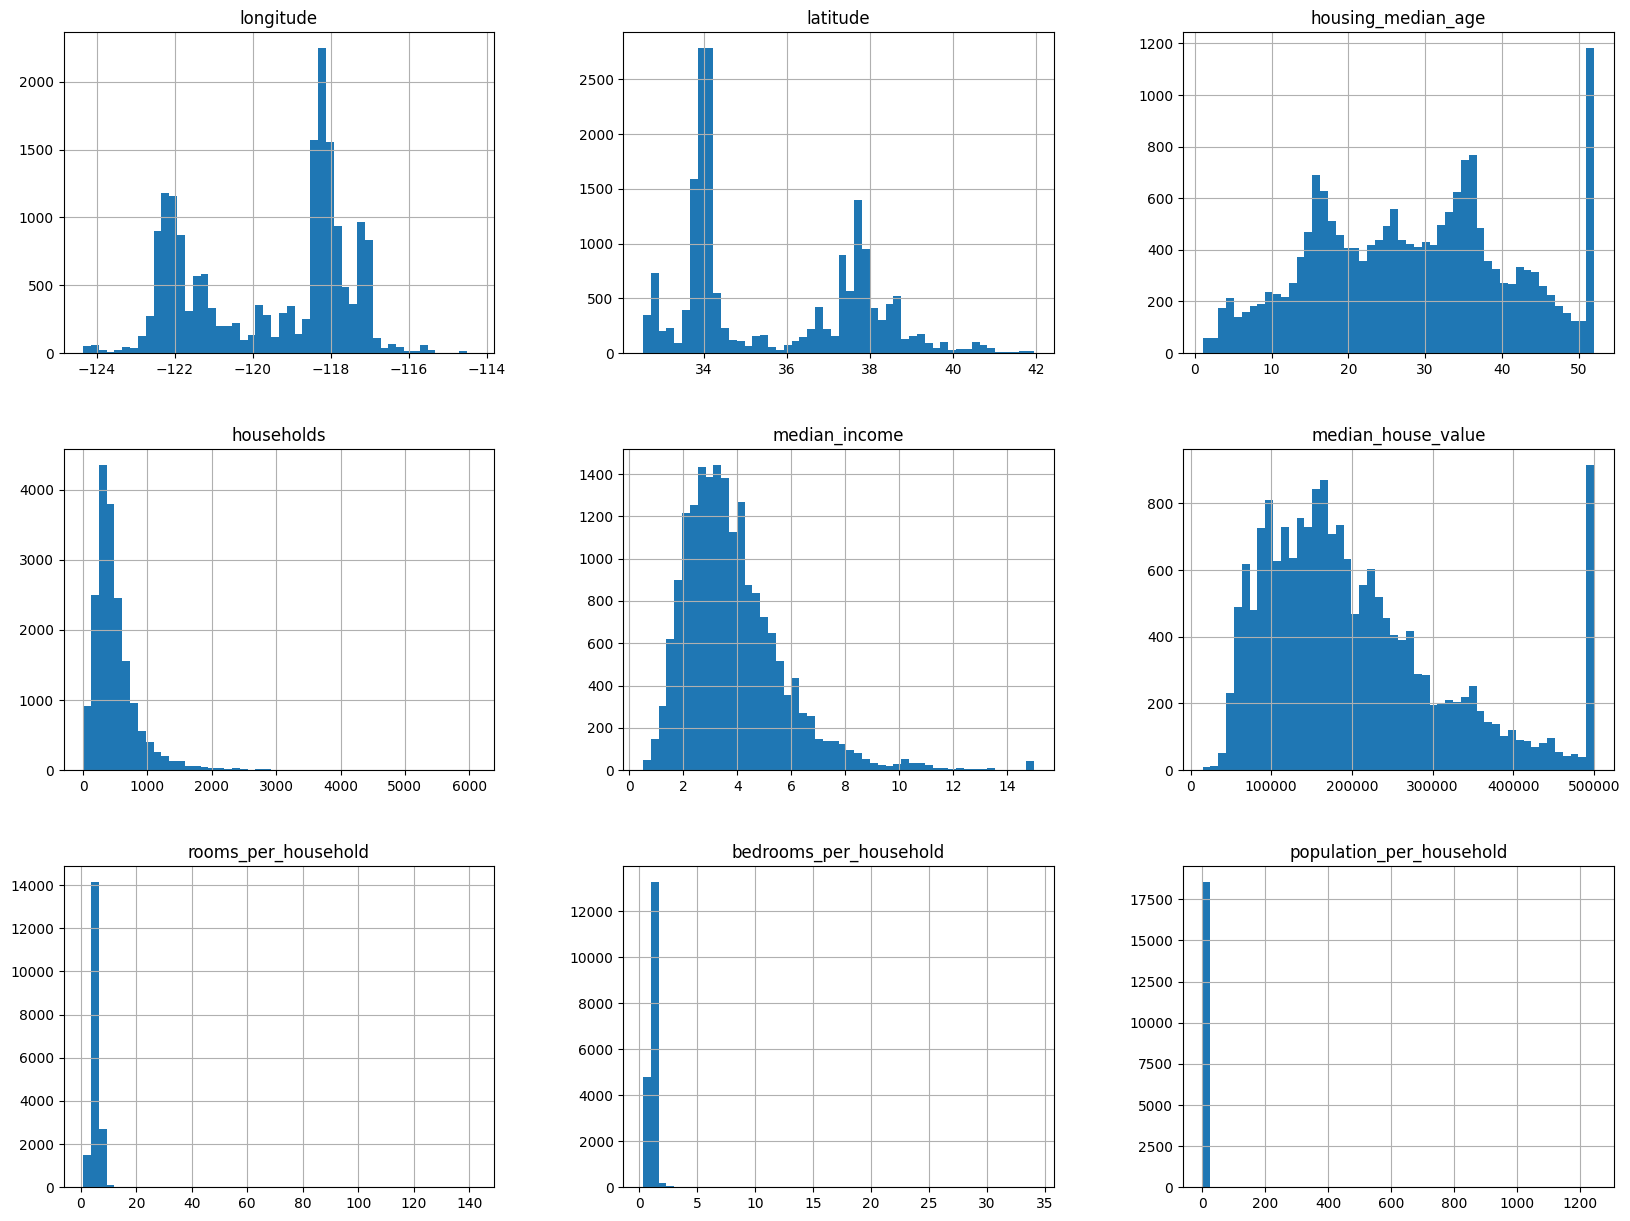

In [19]:
train_df.hist(bins=50, figsize=(20, 15));

**Quais transformações são necessárias?**

* Alguns missing values na coluna `total_bedrooms`
* Valores numéricos em escalas muito diferentes
* Variável categórica

Vamos usar a biblioteca scikit-learn.
Leia sobre as técnicas de pre-processamento: https://scikit-learn.org/stable/modules/preprocessing.html

## Mãos à obra

1. Vamos primeiro criar um modelo para servir de baseline

In [20]:
# We are droping the categorical variable ocean_proximity for now
X_train = train_df.drop(columns=["median_house_value", "ocean_proximity"])
y_train = train_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "ocean_proximity"])
y_test = test_df["median_house_value"]

In [21]:
results_dict = {} # dict to store the results for different models



In [22]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [23]:
dummy = DummyRegressor(strategy="median")
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True
)

In [24]:
pd.DataFrame(results_dict)

,dummy
fit_time,0.001 (+/- 0.000)
score_time,0.000 (+/- 0.000)
test_score,-0.055 (+/- 0.012)
train_score,-0.055 (+/- 0.001)


## Outro modelo

Vamos agora construir um modelo utilizando o KNN

In [25]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Qual é o problema?**

* O modelo KNN não sabe lidar com missing values (NaNs)
* Como resolver?
    * Apagar as linhas?
    * Substituir os valores ausentes com valores razoáveis?

## Imputation



<div class="alert alert-block alert-warning">
<b>Cuidado:</b> introduzir dados na maioria das vezes não é uma boa ideia!
</div>

- `SimpleImputer` é um transformador do `sklearn` para lidar com missing data. Por exemplo:
    - Você pode introduzir valores em variáveis categóricas com o valor mais frequente.
    - Você pode introduzir valores em variáveis numéricas com a média ou mediana.

In [ ]:
X_train.sort_values("bedrooms_per_household")

In [26]:
X_train.shape


(18576, 8)

In [27]:
X_test.shape

(2064, 8)

In [28]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

Vamos verificar se sobraram missing values

In [29]:
X_train_imp[np.isnan(X_train_imp)]

array([], dtype=float64)

- Repare que o resultado do `SimpleImputer` é um `numpy.array` não um dataframe

O modelo já funciona:

In [30]:
knn = KNeighborsRegressor()
knn.fit(X_train_imp, y_train)

KNeighborsRegressor()

In [31]:
results_dict["knn_1"] = mean_std_cross_val_scores(
    knn, X_train_imp, y_train, return_train_score=True
)

In [32]:
pd.DataFrame(results_dict)

,dummy,knn_1
fit_time,0.001 (+/- 0.000),0.004 (+/- 0.000)
score_time,0.000 (+/- 0.000),0.015 (+/- 0.003)
test_score,-0.055 (+/- 0.012),0.292 (+/- 0.012)
train_score,-0.055 (+/- 0.001),0.543 (+/- 0.002)


## Scaling

* Este é um problema que causa grande impacto em muitos dos modelos de ML
* Há várias estratégias para este problema. Vamos ver algumas delas.

| Estratégia | O que faz?         | Como atualizar $X$? | sklearn |
|--|--------------------|---------------------|---------|
| standardization | mean = 0 e std = 1 |   `X -= np.mean(X,axis=0)`<br>`X /=  np.std(X,axis=0)`| [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)|
| normalization | define intervalo em [0, 1] |   `X -= np.min(X,axis=0)`<br>`X /=  np.max(X,axis=0)`| [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)|


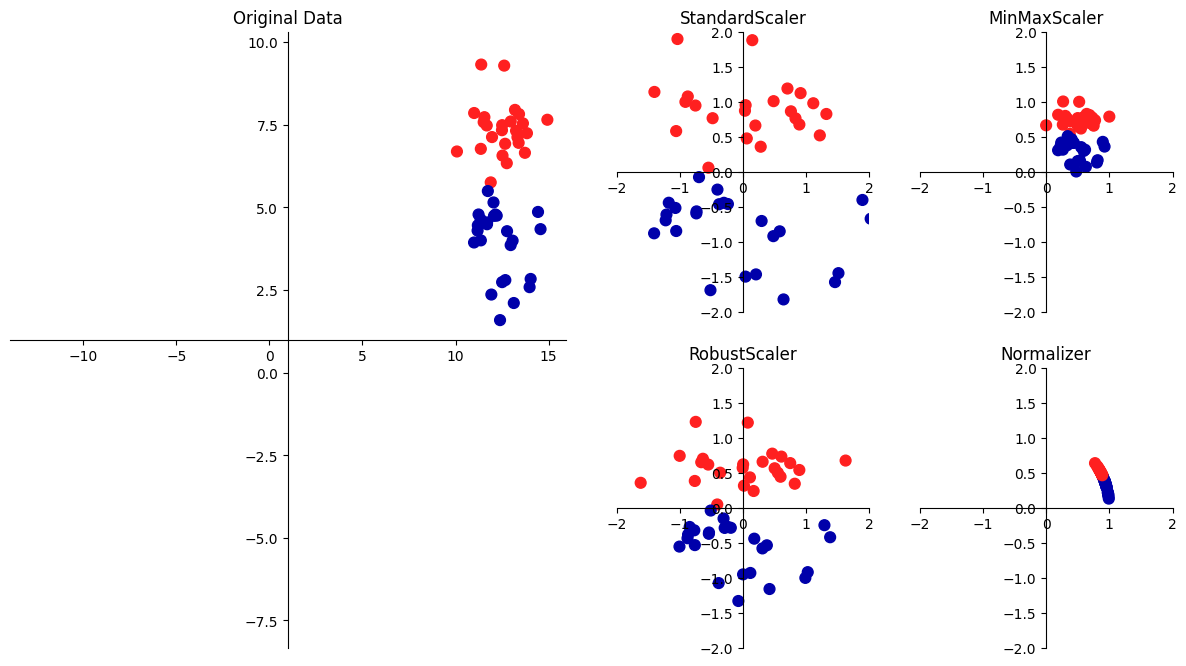

In [33]:
# [source](https://amueller.github.io/COMS4995-s19/slides/aml-05-preprocessing/#8)
mglearn.plots.plot_scaling()

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,longitude,latitude,housing_median_age,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,0.908140,-0.743917,-0.526078,0.266135,-0.389736,-0.210591,-0.083813,0.126398
1,-0.002057,1.083123,-0.923283,-1.253312,-0.198924,4.726412,11.166631,-0.050132
2,1.218207,-1.352930,1.380504,0.542873,-0.635239,-0.273606,-0.025391,-0.099240
3,1.128188,-0.753286,-0.843842,-0.561467,0.714077,0.122307,-0.280310,0.010183
4,1.168196,-1.287344,-0.843842,2.500924,-1.059242,-0.640266,-0.190617,0.126808
...,...,...,...,...,...,...,...,...
18571,0.733102,-0.804818,0.586095,-0.966131,-0.118182,0.063110,-0.099558,0.071541
18572,1.163195,-1.057793,-1.161606,0.728235,0.357500,0.235096,-0.163397,0.007458
18573,-1.097293,0.797355,-1.876574,0.514155,0.934269,0.211892,-0.135305,0.044029
18574,-1.437367,1.008167,1.221622,-0.454427,0.006578,-0.273382,-0.149822,-0.132875


In [35]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)

0.7978563117812038

* Há uma grande diferença no score no KNN
* Mas vamos ver como fica no cross-validation

In [36]:
results_dict["knn_2"] = mean_std_cross_val_scores(
    knn, X_train_scaled, y_train, return_train_score=True
)

pd.DataFrame(results_dict)

,dummy,knn_1,knn_2
fit_time,0.001 (+/- 0.000),0.004 (+/- 0.000),0.004 (+/- 0.000)
score_time,0.000 (+/- 0.000),0.015 (+/- 0.003),0.082 (+/- 0.022)
test_score,-0.055 (+/- 0.012),0.292 (+/- 0.012),0.687 (+/- 0.008)
train_score,-0.055 (+/- 0.001),0.543 (+/- 0.002),0.793 (+/- 0.002)


In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,longitude,latitude,housing_median_age,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,0.657371,0.159405,0.411765,0.098832,0.181039,0.028717,0.021437,0.002918
1,0.476096,0.573858,0.313725,0.003124,0.205942,0.116642,0.182806,0.001495
2,0.719124,0.021254,0.882353,0.116264,0.148998,0.027594,0.022275,0.001099
3,0.701195,0.157279,0.333333,0.046703,0.325099,0.034645,0.018619,0.001981
4,0.709163,0.036132,0.333333,0.239599,0.093661,0.021064,0.019905,0.002922
...,...,...,...,...,...,...,...,...
18571,0.622510,0.145590,0.686275,0.021214,0.216480,0.033591,0.021211,0.002476
18572,0.708167,0.088204,0.254902,0.127939,0.278562,0.036654,0.020296,0.001959
18573,0.257968,0.509033,0.078431,0.114455,0.353836,0.036241,0.020699,0.002254
18574,0.190239,0.556854,0.843137,0.053445,0.232762,0.027598,0.020490,0.000828


In [38]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)

0.8006485189373813

In [39]:
results_dict["knn_3"] = mean_std_cross_val_scores(
    knn, X_train_scaled, y_train, return_train_score=True
)

pd.DataFrame(results_dict)

,dummy,knn_1,knn_2,knn_3
fit_time,0.001 (+/- 0.000),0.004 (+/- 0.000),0.004 (+/- 0.000),0.004 (+/- 0.000)
score_time,0.000 (+/- 0.000),0.015 (+/- 0.003),0.082 (+/- 0.022),0.035 (+/- 0.010)
test_score,-0.055 (+/- 0.012),0.292 (+/- 0.012),0.687 (+/- 0.008),0.690 (+/- 0.007)
train_score,-0.055 (+/- 0.001),0.543 (+/- 0.002),0.793 (+/- 0.002),0.797 (+/- 0.001)


**Verdadeiro ou Falso?**

1. `StandardScaler` garante um intervalo fixo (ou sexa, valores máximo e mínimo) para as features
2. `StandardScaler` calcula a média e o desvio padrão para cada feature separadamente
3. As features transformadas podem se tornar difíceis de interpretar.

Vamos olhar para a Standardization de maneira mais detalhada.
Para isso, vamos criar dados sintéticos.

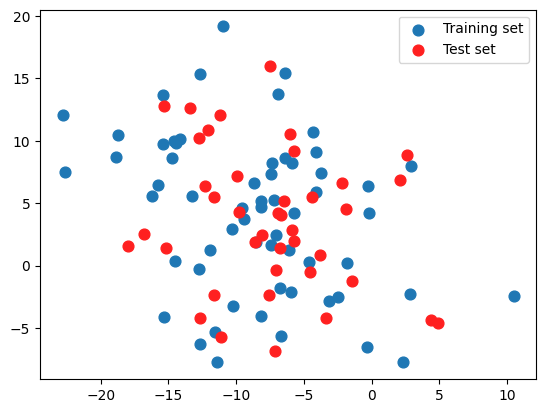

In [40]:
from sklearn.datasets import make_blobs, make_classification

# make synthetic data
X, y = make_blobs(n_samples=100, centers=3, random_state=12, cluster_std=5)
# split it into training and test sets
X_train_toy, X_test_toy, y_train_toy, y_test_toy = train_test_split(
    X, y, random_state=5, test_size=0.4)
plt.scatter(X_train_toy[:, 0], X_train_toy[:, 1], label="Training set", s=60)
plt.scatter(
    X_test_toy[:, 0], X_test_toy[:, 1], color=mglearn.cm2(1), label="Test set", s=60
)
plt.legend(loc="upper right");

In [41]:
scaler = StandardScaler()
train_transformed = scaler.fit_transform(X_train_toy)
test_transformed = scaler.transform(X_test_toy)

In [42]:
X_train_toy[:, 0].mean(), X_train_toy[:, 0].std()

(-8.600287211119548, 6.2702469465199355)

In [43]:
X_train_toy[:, 1].mean(), X_train_toy[:, 1].std()

(4.124686209266641, 6.2749592279985595)

In [44]:
def plot_original_scaled(
    X_train,
    X_test,
    train_transformed,
    test_transformed,
    title_transformed="Properly transformed",
):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    axes[0].scatter(X_train[:, 0], X_train[:, 1], label="Training set", s=60)
    axes[0].scatter(
        X_test[:, 0],
        X_test[:, 1],
        marker="^",
        color=mglearn.cm2(1),
        label="Test set",
        s=60,
    )
    axes[0].legend(loc="upper right")

    axes[0].set_title("Original Data")

    axes[1].scatter(
        train_transformed[:, 0], train_transformed[:, 1], label="Training set", s=60
    )
    axes[1].scatter(
        test_transformed[:, 0],
        test_transformed[:, 1],
        marker="^",
        color=mglearn.cm2(1),
        label="Test set",
        s=60,
    )
    axes[1].legend(loc="upper right")
    axes[1].set_title(title_transformed);

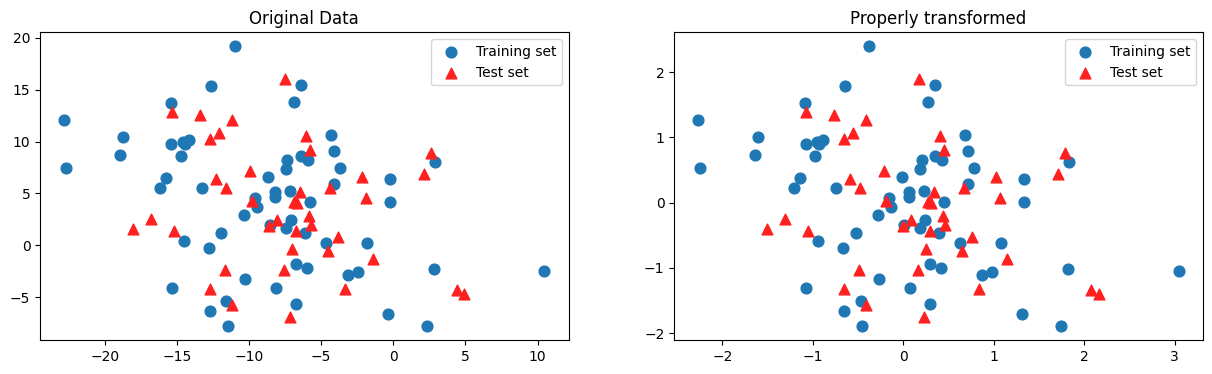

In [45]:
plot_original_scaled(X_train_toy, X_test_toy, train_transformed, test_transformed)

## Mau exemplo: Scaling dos dados separadamente

Porquê não devemos fazer isto?

In [46]:
# DO NOT DO THIS! For illustration purposes only.
scaler = StandardScaler()
scaler.fit(X_train_toy)
train_scaled = scaler.transform(X_train_toy)

scaler = StandardScaler()  # Creating a separate object for scaling test data
scaler.fit(X_test_toy)  # Calling fit on the test data
test_scaled = scaler.transform(
    X_test_toy
)  # Transforming the test data using the scaler fit on test data

knn = KNeighborsClassifier()
knn.fit(train_scaled, y_train_toy)
print(f"Training score: {knn.score(train_scaled, y_train_toy):.2f}")
print(f"Test score: {knn.score(test_scaled, y_test_toy):.2f}")

Training score: 0.63
Test score: 0.60


* Tem algo errado na metodologia? O quê?

In [47]:
X_train_toy[:, 0].mean(), X_train_toy[:, 0].std() # mean and std of column 1 in X_train_toy

(-8.600287211119548, 6.2702469465199355)

In [48]:
X_train_toy[:, 1].mean(), X_train_toy[:, 1].std() # mean and std of column 2 in X_train_toy

(4.124686209266641, 6.2749592279985595)

In [49]:
X_test_toy[:, 0].mean(), X_test_toy[:, 0].std() # mean and std of column 1 in X_test_toy

(-7.4360796317881865, 5.415791218175096)

In [50]:
X_test_toy[:, 1].mean(), X_test_toy[:, 1].std() # mean and std of column 2 in X_train_toy

(3.584450392629585, 5.5947435906433025)

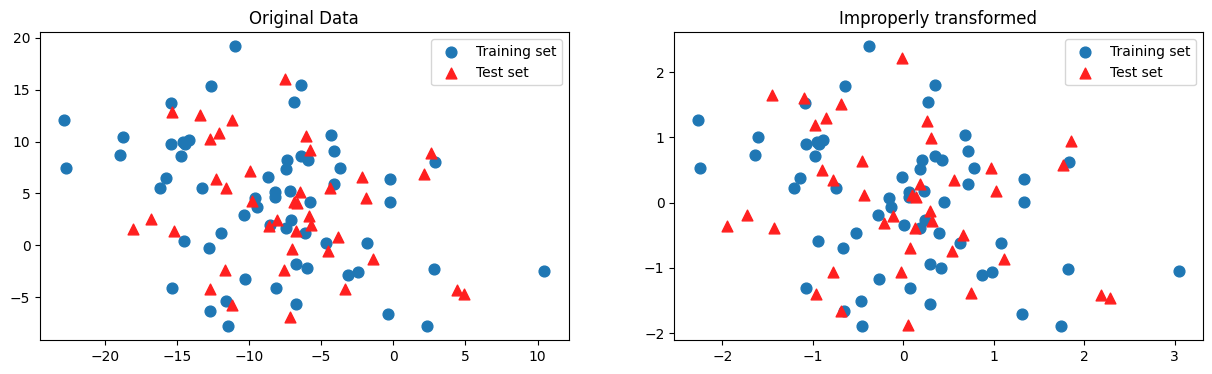

In [51]:
plot_original_scaled(
    X_train_toy,
    X_test_toy,
    train_scaled,
    test_scaled,
    title_transformed="Improperly transformed",
)

## Mau exemplo: Scaling dos dados juntos

In [52]:
# join the train and test sets back together
XX = np.vstack((X_train_toy, X_test_toy))
XX.shape

(100, 2)

In [53]:
scaler = StandardScaler()
scaler.fit(XX)
XX_scaled = scaler.transform(XX)
XX_train = XX_scaled[:X_train_toy.shape[0]]
XX_test = XX_scaled[X_train_toy.shape[0]:]

In [54]:
knn = KNeighborsClassifier()
knn.fit(XX_train, y_train_toy)
print(f"Training score: {knn.score(XX_train, y_train_toy):.2f}")  # Misleading score
print(f"Test score: {knn.score(XX_test, y_test_toy):.2f}")  # Misleading score

Training score: 0.63
Test score: 0.55


Tem algo errado nesta metodologia?
O quê?


In [55]:
X_train_toy[:, 0].mean(), X_train_toy[:, 0].std() # mean and std of column 1 in X_train_toy

(-8.600287211119548, 6.2702469465199355)

In [56]:
X_train_toy[:, 1].mean(), X_train_toy[:, 1].std() # mean and std of column 2 in X_train_toy

(4.124686209266641, 6.2749592279985595)

In [57]:
XX[:, 0].mean(), XX[:, 0].std() # mean and std of column 1 in XX

(-8.134604179387004, 5.970528192615454)

In [58]:
XX[:, 1].mean(), XX[:, 1].std() # mean and std of column 2 in XX

(3.9085918826118187, 6.017937808158447)

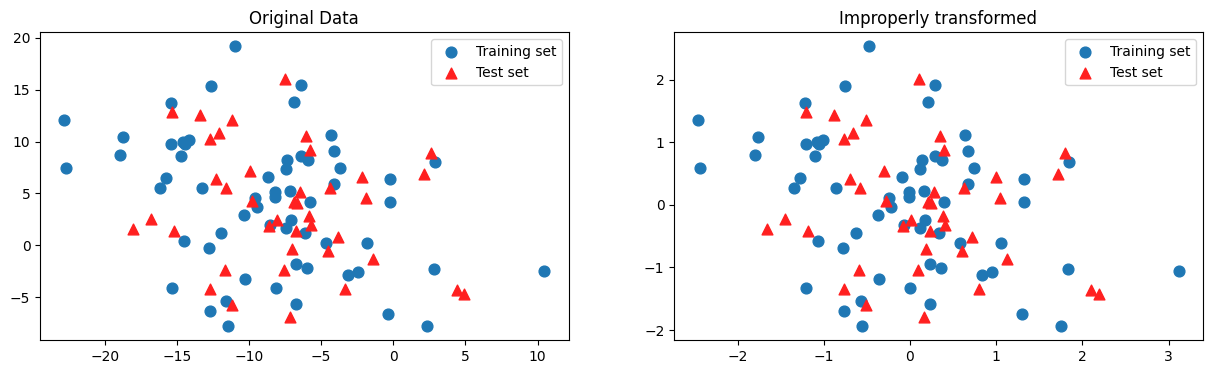

In [59]:
plot_original_scaled(
    X_train_toy,
    X_test_toy,
    XX_train,
    XX_test,
    title_transformed="Improperly transformed",
)

Não é uma diferença notável a olho nu, mas se o conjunto de teste é grande pode influenciar a média e o desvio padrão de maneira significativa.

## Regra de Ouro

Devemos treinar o modelo usando apenas dados de treino. Para isto:
1. Devemos separar o conjunto de dados antes do pre-processamento.
2. Pre-processar apenas os dados de treino.
3. Aplicar as mesmas transformações nos dados de teste.

Nos exemplos anteriores, nós obedecemos esta regra de ouro?


<img src='img/improper_cross.png' width="800">

Com cross-validation é preciso pre-processar os dados para cada fold.


<img src='img/proper_cross.png' width="800">

## Porquê?

Mas então eu tenho que pré-processar os dados a cada subconjunto de treino?

<img src='img/dispair.jpg' width="500">

## Pipelines

Uma maneira mais elegante e organizada de fazer estas operações.

* [`scikit-learn Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
* [`scikit-learn Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) permite a definição de uma "pipeline" de transformadores com um estimador final

In [60]:

from sklearn.pipeline import Pipeline
pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor()),
    ]
)

In [61]:
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

* Sintaxe: passa uma lista de passos
* O último passo deve ser um modelo/classificador/regressor
* Todos os passos anteriores devem ser transformadores


## Outra maneira de usar: `make_pipeline`

* Versão mais curta do construtor `Pipeline`
* Não permite nomear os passos
* Os nomes dos passos são definidos automaticamente como sendo o seu tipo em letra minúscula. Por exemplo `StandardScaler()` é nomeado como `standardscaler`

In [62]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler(), KNeighborsRegressor()
)

In [63]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

Os dados passados são os dados originais, não dados que já passaram por transformações.

Quando chamamos o método `fit` na pipeline, são realizados os seguintes passos:
1. Fit SimpleImputer no conjunto `X_train`
2. Transform `X_train` usando o fit do `SimpleImputer` para criar `X_train_imp`
3. Fit `StandardScaler` no conjunto `X_train_imp`
4. Transforma `X_train_imp` usando fit do `StandardScaler` para criar `X_train_imp_scaled`
5. Fit do modelo (`KNeighborRegressor` no nosso caso) no conjunto `X_Train_imp_scaled`

In [65]:
pipe.predict(X_train)

array([126500., 117380., 187700., ..., 259500., 308120.,  60860.])

Note que também passamos os dados originais para o método `predict`. Nesta fase, a pipeline executa os seguintes passos:
1. Transforma `X_train` usando o fit `SimpleImputer` para criar `X_train_imp`
2. Transforma `X_train_imp` usando o fit do `StandardScaler` para criar `X_train_imp_scaled`
3. Faz as previsões usando o fit do modelo (`KNeighborsRegressor`) em `X_train_imp_scaled`

<img src='./img/pipeline.png' width="800">

[Source](https://amueller.github.io/COMS4995-s20/slides/aml-04-preprocessing/#18)

## Cross-validation com pipeline

Usar uma `Pipeline` faz com que o método `fit_transform` seja aplicado apenas na porção de treino e apenas `transform` na porção de validação em cada fold.

In [66]:
results_dict["imp + scaling + knn"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.000 (+/- 0.000),-0.055 (+/- 0.012),-0.055 (+/- 0.001)
knn_1,0.004 (+/- 0.000),0.015 (+/- 0.003),0.292 (+/- 0.012),0.543 (+/- 0.002)
knn_2,0.004 (+/- 0.000),0.082 (+/- 0.022),0.687 (+/- 0.008),0.793 (+/- 0.002)
knn_3,0.004 (+/- 0.000),0.035 (+/- 0.010),0.690 (+/- 0.007),0.797 (+/- 0.001)
imp + scaling + knn,0.017 (+/- 0.003),0.087 (+/- 0.017),0.693 (+/- 0.014),0.797 (+/- 0.015)


## Variáveis Categóricas

* Nós descartamos a coluna `ocean_proximity` por ser categórica. Mas poderia ser útil na tarefa de prever os valores das casas por distrito.
* Vamos criar nossos conjuntos de treino e teste novamente, agora com esta coluna.

In [67]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'rooms_per_household', 'bedrooms_per_household',
       'population_per_household'],
      dtype='object')

In [68]:
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

Vamos tentar construir um regressor nestes dados usando a nossa pipeline

In [69]:
pipe.fit(X_train, X_train)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'INLAND'

Qual o problema?



## Podemos usar features categóricas no modelo?

* No `scikit-learn` a maioria dos algoritmos só funciona com variáveis numéricas
* Decision trees podem, em teoria, funcionar com variáveis categóricas.
    * Não no `scikit-learn`


**Quais são as nossas opções?**

* Descartar a coluna (não recomendado)
    * Se você souber que aquela coluna não é relevante para o objetivo, pode descartá-la
* Transformar variáveis categóricas em numéricas, para podermos usar no modelo
    * [Ordinal encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) (recomendado em casos específicos)
    * One-hot encoding (recomendado na maioria dos casos)

Vamos ver um exemplo:

In [70]:
X_toy = pd.DataFrame(
    {
        "language": [
            "English",
            "Portugues",
            "English",
            "Mandarin",
            "English",
            "English",
            "Mandarin",
            "English",
            "Portugues",
            "Mandarin",
            "French",
            "Spanish",
            "Mandarin",
            "Hindi",
        ]
    }
)
X_toy

,language
0,English
1,Portugues
2,English
3,Mandarin
4,English
5,English
6,Mandarin
7,English
8,Portugues
9,Mandarin


## Ordinal Encoding

* Apenas atribuímos um valor inteiro para cada categoria única
* Podemos usar o [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) do `scikit-learn`

In [71]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(X_toy)
X_toy_ord = enc.transform(X_toy)
df = pd.DataFrame(
    data=X_toy_ord,
    columns=["language_enc"],
    index=X_toy.index,
)
pd.concat([X_toy, df], axis=1)

,language,language_enc
0,English,0.0
1,Portugues,4.0
2,English,0.0
3,Mandarin,3.0
4,English,0.0
5,English,0.0
6,Mandarin,3.0
7,English,0.0
8,Portugues,4.0
9,Mandarin,3.0


**Quais são os problemas desta abordagem?**

* Adicionamos ordem aos dados categóricos
* Por exemplo, quando formos calcular distâncias... É justo que o Francês e o Hindi sejam mais próximos que o Francês e o Espanhol?
* No geral, OrdinalEncoding é útil quando há ordinalidade nos seus dados, e seja importante mantêla, por exemplo, `[não satisfaz, satisfaz, bom, muito bom]`

## One-hot encoding (OHE)

* Cria novas colunas binárias para representar as categorias
* Se tivermos $C$ categorias na nossa coluna
    * Criamos $C$ colunas binárias novas
* Podemos usar o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) do `scikit-learn`

In [72]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore")
X_toy_ohe = enc.fit_transform(X_toy[['language']])  # Converta a coluna do DataFrame em uma matriz bidimensional
pd.DataFrame(
    data=X_toy_ohe.toarray(),  # Converta a matriz esparsa para um array NumPy
    columns=enc.get_feature_names_out(["language"]),
    index=X_toy.index,
)


,language_English,language_French,language_Hindi,language_Mandarin,language_Portugues,language_Spanish
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


## Vamos fazer nos dados do Kagle

In [73]:
ohe = OneHotEncoder(dtype="int", sparse_output=False)
ohe.fit(X_train[["ocean_proximity"]])
X_imp_ohe_train = ohe.transform(X_train[["ocean_proximity"]])

In [74]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [75]:
transformed_ohe = pd.DataFrame(
    data=X_imp_ohe_train,
    columns=ohe.get_feature_names_out(["ocean_proximity"]),
    index=X_train.index,
)
transformed_ohe

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6051,0,1,0,0,0
20113,0,1,0,0,0
14289,0,0,0,0,1
13665,0,1,0,0,0
14471,0,0,0,0,1
...,...,...,...,...,...
7763,1,0,0,0,0
15377,1,0,0,0,0
17730,1,0,0,0,0
15725,0,0,0,1,0


## E agora?

* Como colocamos isso junto do pré-processamento das variáveis numéricas?
* Antes de usar o regressor, nós queremos aplicar transformações diferentes em diferentes
    * Colunas numéricas
        * imputation
        * scaling
    * Colunas categóricas
        * imputation
        * one-hot encoding

## skcikit-learn's [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

* Na maioria das aplicações, algumas colunas são categóricas, outras são contínuas, outras binárias e outras ordinais
* Quando queremos desenvolver pipelines de modelos supervisionados em dados reais, precisamos aplicar transformações diferentes em colunas diferentes
* Vamos usar o `ColumnTransformer` do `scikit-learn`


In [76]:
housing_df = pd.read_csv("data/housing.csv")
train_df, test_df = train_test_split(housing_df, test_size=0.1, random_state=123)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6051,-117.75,34.04,22.0,2948.0,636.0,2600.0,602.0,3.1250,113600.0,INLAND
20113,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,137500.0,INLAND
14289,-117.13,32.74,46.0,3355.0,768.0,1457.0,708.0,2.6604,170100.0,NEAR OCEAN
13665,-117.31,34.02,18.0,1634.0,274.0,899.0,285.0,5.2139,129300.0,INLAND
14471,-117.23,32.88,18.0,5566.0,1465.0,6303.0,1458.0,1.8580,205000.0,NEAR OCEAN


In [77]:
train_df = train_df.assign(
    rooms_per_household=train_df["total_rooms"] / train_df["households"]
)
test_df = test_df.assign(
    rooms_per_household=test_df["total_rooms"] / test_df["households"]
)

train_df = train_df.assign(
    bedrooms_per_household=train_df["total_bedrooms"] / train_df["households"]
)
test_df = test_df.assign(
    bedrooms_per_household=test_df["total_bedrooms"] / test_df["households"]
)

train_df = train_df.assign(
    population_per_household=train_df["population"] / train_df["households"]
)
test_df = test_df.assign(
    population_per_household=test_df["population"] / test_df["households"]
)

In [78]:
# Let's keep both numeric and categorical columns in the data.
X_train = train_df.drop(columns=["median_house_value", "total_rooms", "total_bedrooms", "population"])
y_train = train_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "total_rooms", "total_bedrooms", "population"])
y_test = test_df["median_house_value"]

In [79]:
from sklearn.compose import ColumnTransformer, make_column_transformer

In [80]:
X_train.head(10)

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
6051,-117.75,34.04,22.0,602.0,3.1250,INLAND,4.897010,1.056478,4.318937
20113,-119.57,37.94,17.0,20.0,3.4861,INLAND,17.300000,6.500000,2.550000
14289,-117.13,32.74,46.0,708.0,2.6604,NEAR OCEAN,4.738701,1.084746,2.057910
13665,-117.31,34.02,18.0,285.0,5.2139,INLAND,5.733333,0.961404,3.154386
14471,-117.23,32.88,18.0,1458.0,1.8580,NEAR OCEAN,3.817558,1.004801,4.323045
9730,-121.74,36.79,16.0,611.0,4.3814,<1H OCEAN,6.286416,1.014730,2.944354
14690,-117.09,32.80,36.0,360.0,4.7188,NEAR OCEAN,6.008333,1.019444,2.541667
7938,-118.11,33.86,33.0,393.0,5.3889,<1H OCEAN,6.078880,1.043257,3.127226
18365,-122.12,37.28,21.0,56.0,5.8691,<1H OCEAN,6.232143,1.142857,2.660714
10931,-117.91,33.74,25.0,922.0,2.9926,<1H OCEAN,4.634490,1.046638,3.195228


In [81]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='object')

- Scaling e imputation nas features numericas
- One-hot encoding na feature categórica `ocean_proximity`

In [82]:
# Identify the categorical and numeric columns
numeric_features = [
    "longitude",
    "latitude",
    "housing_median_age",
    "households",
    "median_income",
    "rooms_per_household",
    "bedrooms_per_household",
    "population_per_household",
]

categorical_features = ["ocean_proximity"]
target = "median_income"

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18576 entries, 6051 to 19966
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18576 non-null  float64
 1   latitude                  18576 non-null  float64
 2   housing_median_age        18576 non-null  float64
 3   households                18576 non-null  float64
 4   median_income             18576 non-null  float64
 5   ocean_proximity           18576 non-null  object 
 6   rooms_per_household       18576 non-null  float64
 7   bedrooms_per_household    18391 non-null  float64
 8   population_per_household  18576 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [84]:
X_train["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8221
INLAND        5915
NEAR OCEAN    2389
NEAR BAY      2046
ISLAND           5
Name: count, dtype: int64

In [85]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
)

In [86]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'households', 'median_income',
                                  'rooms_per_household',
                                  'bedrooms_per_household',
                                  'population_per_household']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])

In [87]:
X_train_pp = preprocessor.fit_transform(X_train)

* Quando invocamos o `fit` no preprocessor, ele chama `fit` em todos os transformadores.
* Quando chamamos `transform` no preprocessor, ele chama `transform` em todos os transformadores

Podemos obter os novos nomes das colunas

In [88]:
preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
    categorical_features
)

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

Combinando estas novas colunas com as features numéricas, temos todas as colunas:

In [89]:
column_names = numeric_features + list(
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_features
    )
)
column_names

['longitude',
 'latitude',
 'housing_median_age',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [90]:
pd.DataFrame(X_train_pp, columns=column_names)

,longitude,latitude,housing_median_age,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.908140,-0.743917,-0.526078,0.266135,-0.389736,-0.210591,-0.083813,0.126398,0.0,1.0,0.0,0.0,0.0
1,-0.002057,1.083123,-0.923283,-1.253312,-0.198924,4.726412,11.166631,-0.050132,0.0,1.0,0.0,0.0,0.0
2,1.218207,-1.352930,1.380504,0.542873,-0.635239,-0.273606,-0.025391,-0.099240,0.0,0.0,0.0,0.0,1.0
3,1.128188,-0.753286,-0.843842,-0.561467,0.714077,0.122307,-0.280310,0.010183,0.0,1.0,0.0,0.0,0.0
4,1.168196,-1.287344,-0.843842,2.500924,-1.059242,-0.640266,-0.190617,0.126808,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18571,0.733102,-0.804818,0.586095,-0.966131,-0.118182,0.063110,-0.099558,0.071541,1.0,0.0,0.0,0.0,0.0
18572,1.163195,-1.057793,-1.161606,0.728235,0.357500,0.235096,-0.163397,0.007458,1.0,0.0,0.0,0.0,0.0
18573,-1.097293,0.797355,-1.876574,0.514155,0.934269,0.211892,-0.135305,0.044029,1.0,0.0,0.0,0.0,0.0
18574,-1.437367,1.008167,1.221622,-0.454427,0.006578,-0.273382,-0.149822,-0.132875,0.0,0.0,0.0,1.0,0.0


In [91]:
knn_pipe = make_pipeline(preprocessor, KNeighborsRegressor())

In [92]:
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_household',
                                                   'population_per_household']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [93]:
results_dict["imp + scaling + ohe + KNN"] = mean_std_cross_val_scores(
    knn_pipe, X_train, y_train, return_train_score=True
)

In [94]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.000 (+/- 0.000),-0.055 (+/- 0.012),-0.055 (+/- 0.001)
knn_1,0.004 (+/- 0.000),0.015 (+/- 0.003),0.292 (+/- 0.012),0.543 (+/- 0.002)
knn_2,0.004 (+/- 0.000),0.082 (+/- 0.022),0.687 (+/- 0.008),0.793 (+/- 0.002)
knn_3,0.004 (+/- 0.000),0.035 (+/- 0.010),0.690 (+/- 0.007),0.797 (+/- 0.001)
imp + scaling + knn,0.017 (+/- 0.003),0.087 (+/- 0.017),0.693 (+/- 0.014),0.797 (+/- 0.015)
imp + scaling + ohe + KNN,0.021 (+/- 0.005),0.135 (+/- 0.017),0.706 (+/- 0.015),0.806 (+/- 0.015)


## OHE com muitas categorias

* OHE pode resultar em um número muito grande de colunas
* Para definir se queremos usar esta estratégia é preciso ter em conta o número de valores possíveis em cada categoria vs a disponibilidade de dados
* Temos dados o suficiente para que valores raros sejam representativos?
* Pode fazer sentido criar uma categoria genérica para os casos raros.


## Melhorar o modelo
* Além do pré-processamento, podemos tomar outras medidas que podem melhorar o modelo
* Seleção de features: você quer usar todas as features?
* Hyperparameters tunning

## TPC

* Estudar o [notebook]("../homework/00_Preprocessing.ipynb") sobre outras operações de pré-processamento
* [CDA_Lab1]("../homework/01-CDA_Lab1.ipynb")
